# Project Data Mining


- kali ini saya ingin menelitia dengan dataset minuman 'wine'  berikut dataset nya.


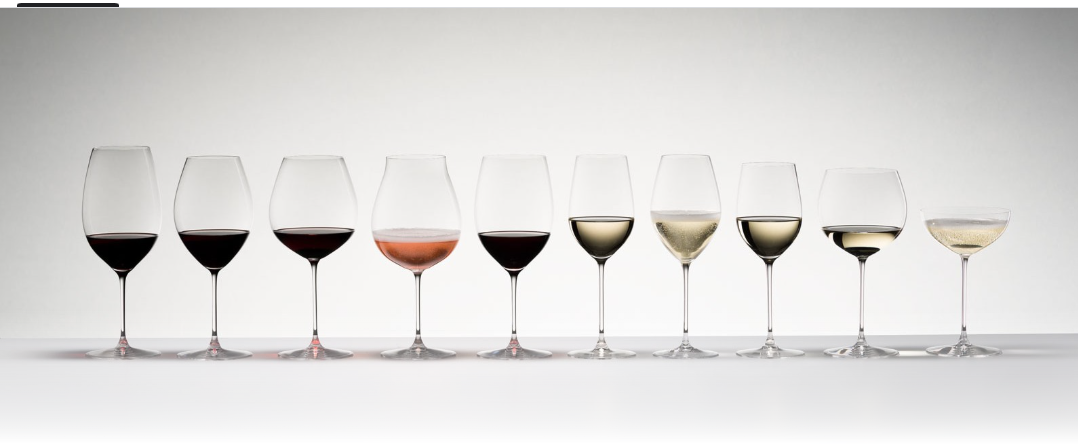

- dalam hal ini saya menggunakan klasifikasi dalam memprediksi Wine dengan yang mana baik dan tidak
kolom dan baris dalam dataset berjumlah 1143 rows × 13 columns

# Overview Dataset

# Import LIB

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Panggil data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DM/WineQT.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


disini feature 'id' tidak terlalu penting dan berkontribusi akan saya feature engineering kan / saya hapus

In [ ]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [ ]:
data.shape

(1143, 12)

In [ ]:
data.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,True
...,...
1138,False
1139,False
1140,False
1141,False


# Outlier

In [ ]:
numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)]

In [ ]:
from scipy.stats.mstats import winsorize
numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for col in numerical_cols:
    data.loc[((data[col] < lower_bound[col]) | (data[col] > upper_bound[col])), col] = data[col].median()
for col in numerical_cols:
  data[col] = winsorize(data[col], limits=[0.05, 0.05])

In [ ]:
data['fixed acidity'] = np.log1p(data['fixed acidity'])
data['volatile acidity'] = np.log1p(data['volatile acidity'])
data['alcohol'] = np.log1p(data['alcohol'])
data['chlorides'] = np.log1p(data['chlorides'])
data['citric acid'] = np.log1p(data['citric acid'])
data['density'] = np.log1p(data['density'])
data['free sulfur dioxide'] = np.log1p(data['free sulfur dioxide'])
data['residual sugar'] = np.log1p(data['residual sugar'])
data['pH'] = np.log1p(data['pH'])
data['sulphates'] = np.log1p(data['sulphates'])
data['total sulfur dioxide'] = np.log1p(data['total sulfur dioxide'])

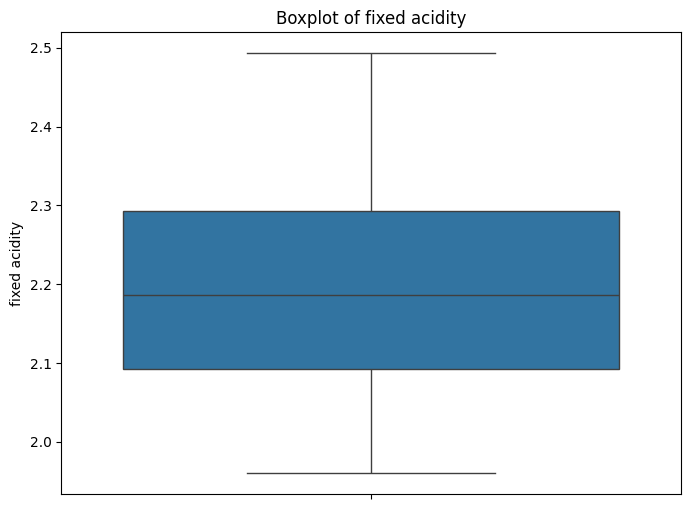

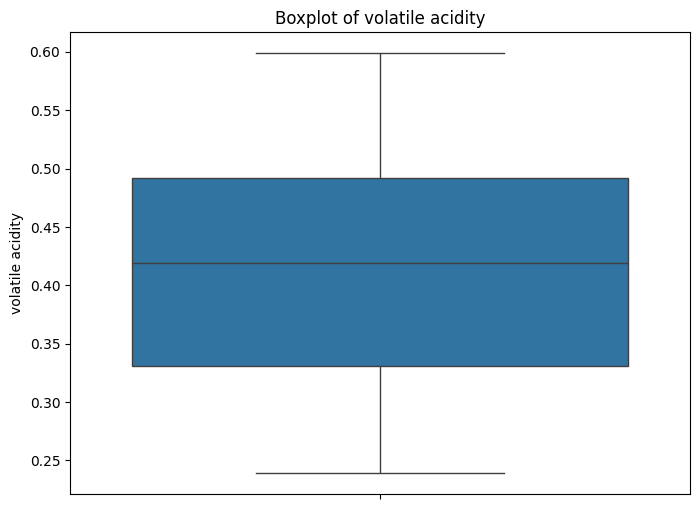

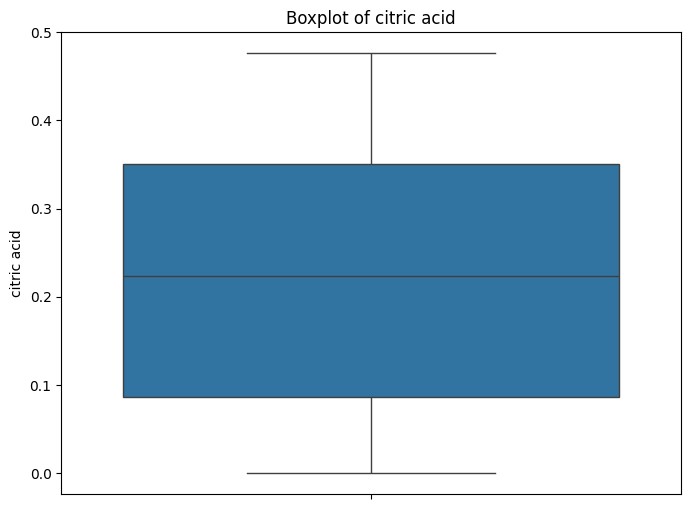

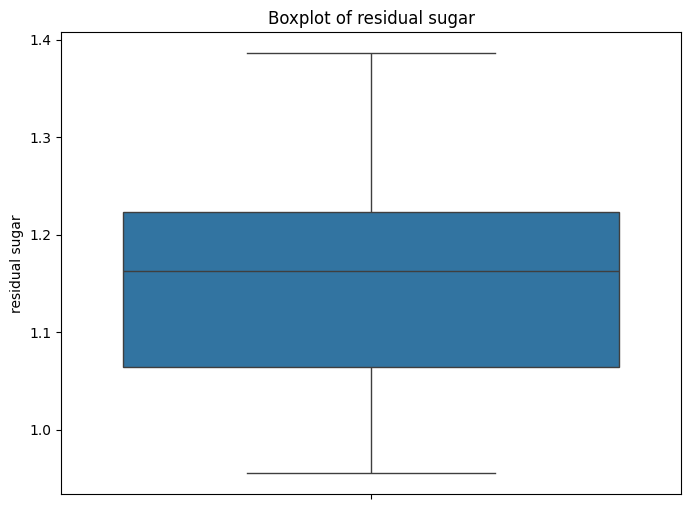

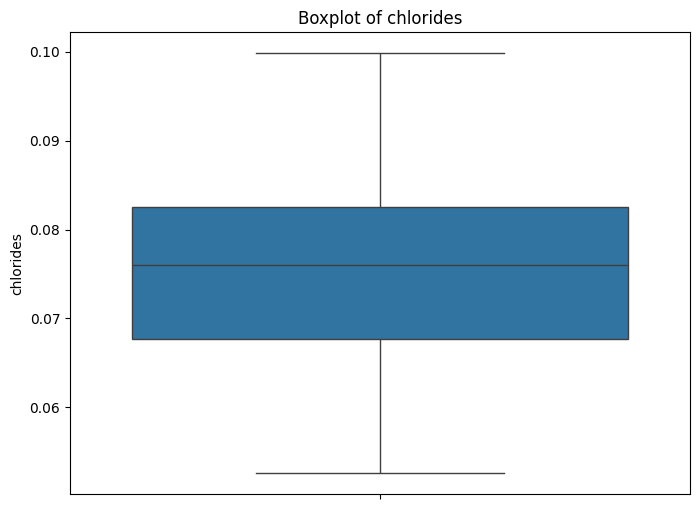

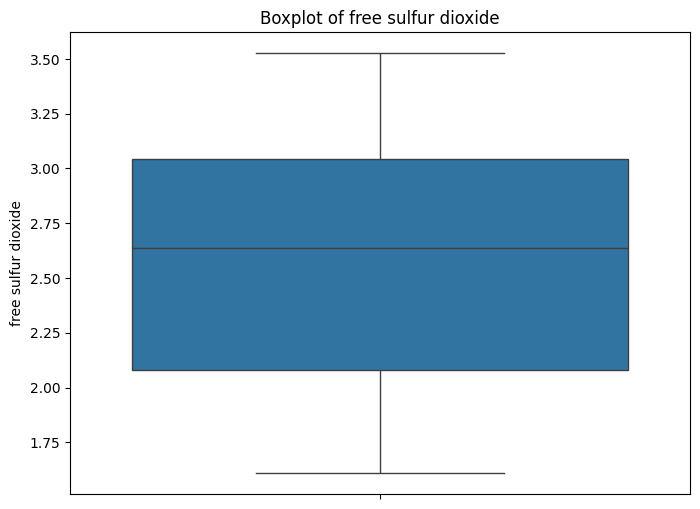

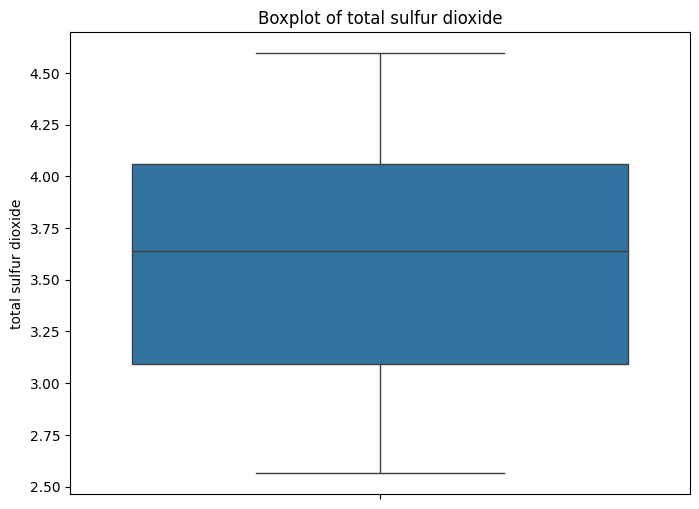

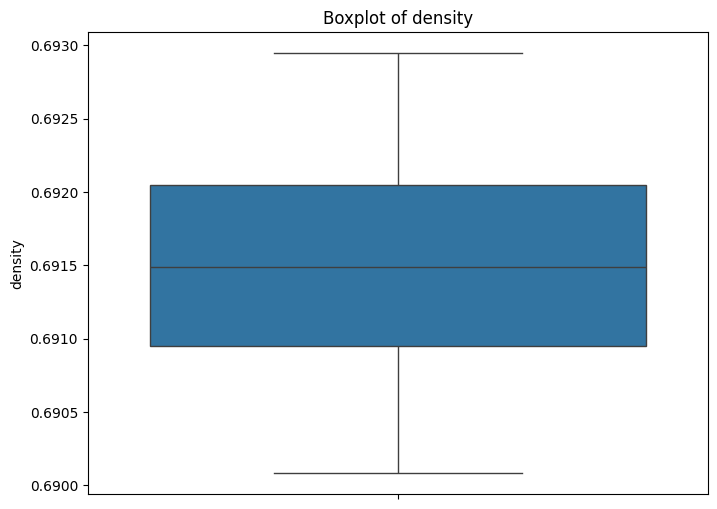

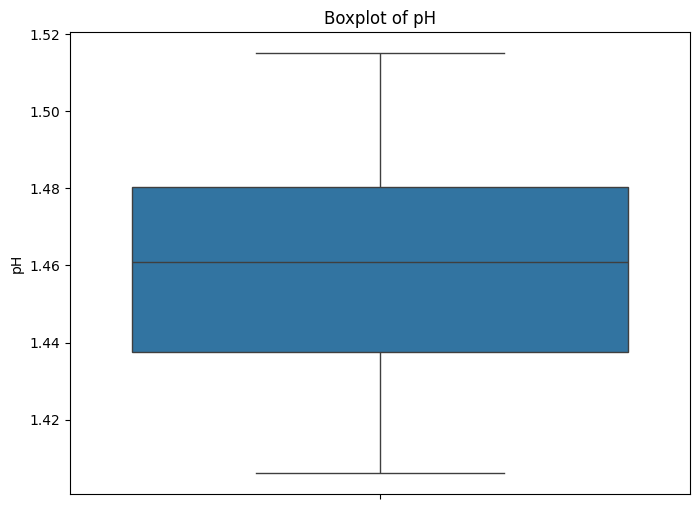

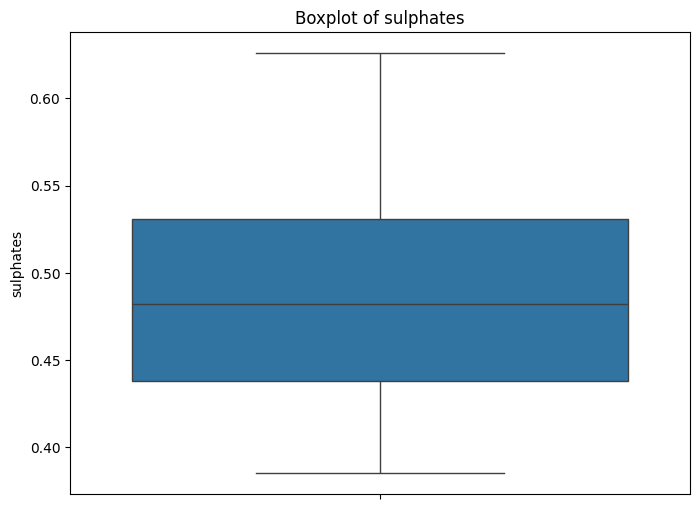

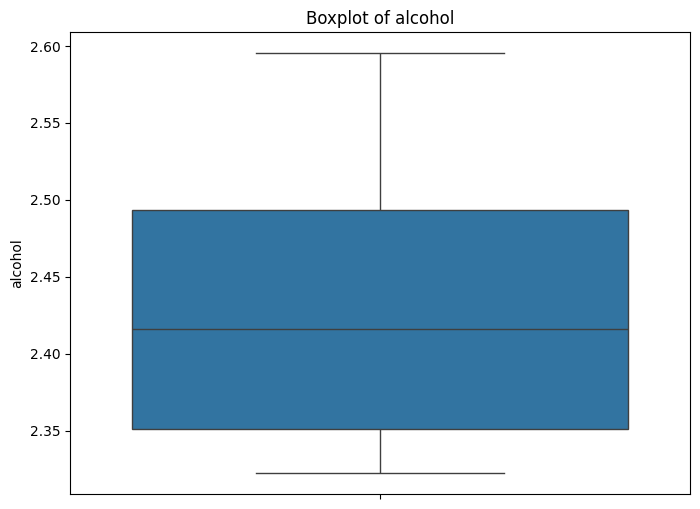

In [ ]:
numerical_features = data.select_dtypes(include=['float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

# EDA

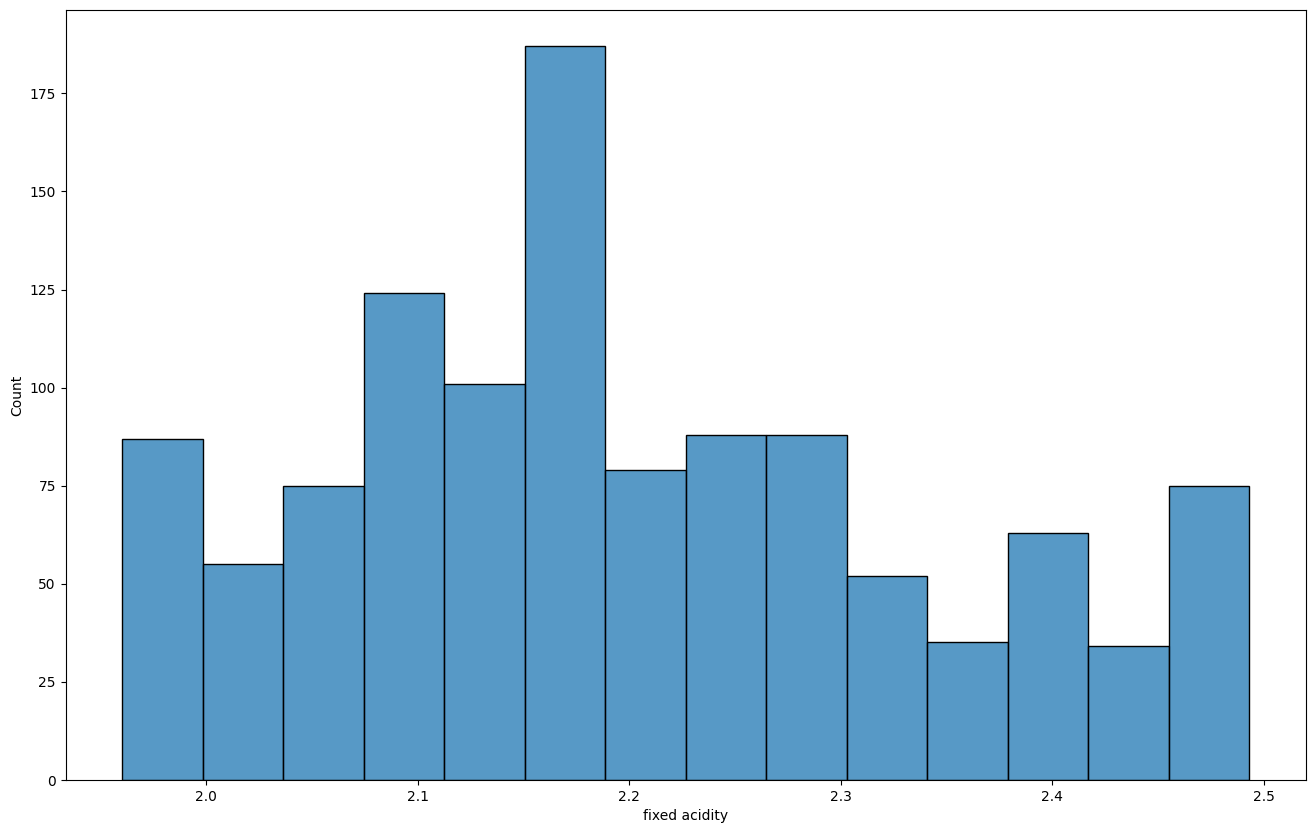

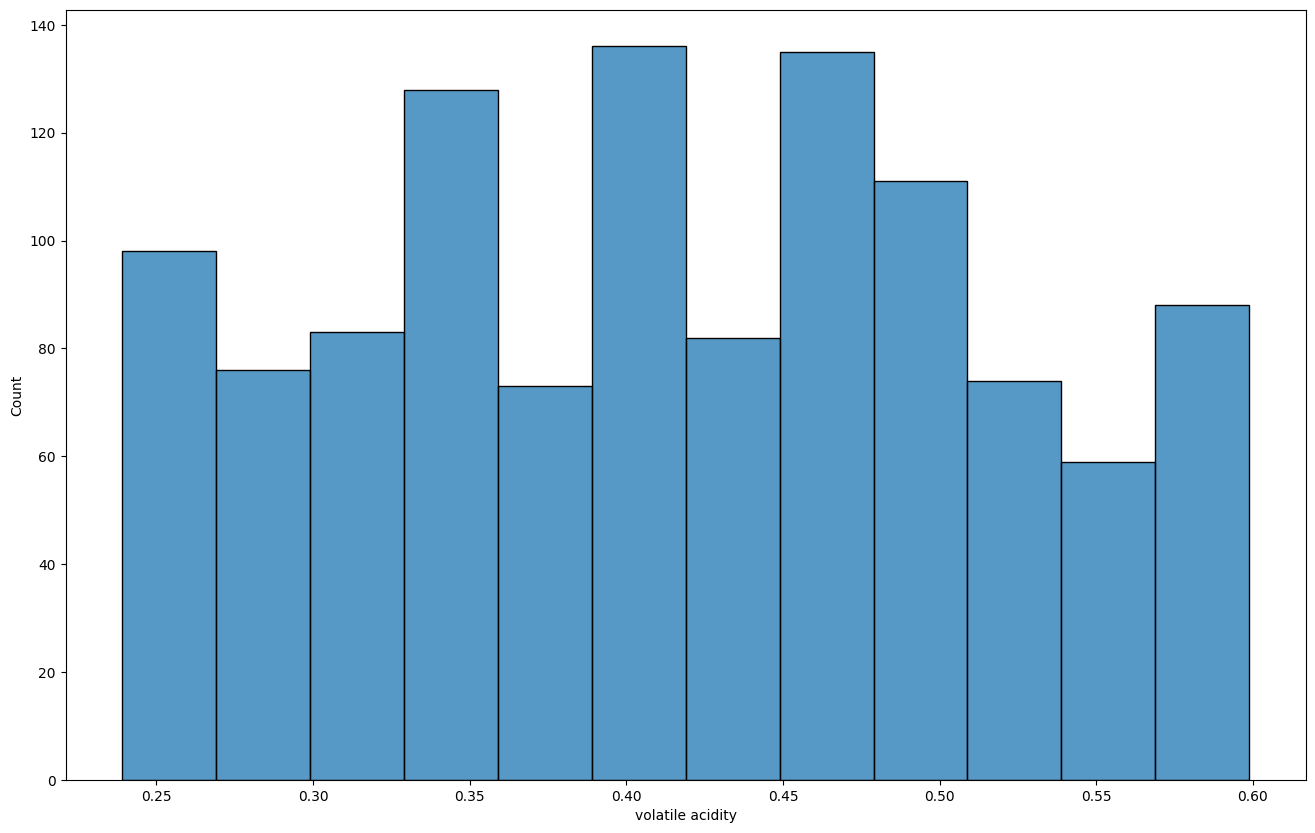

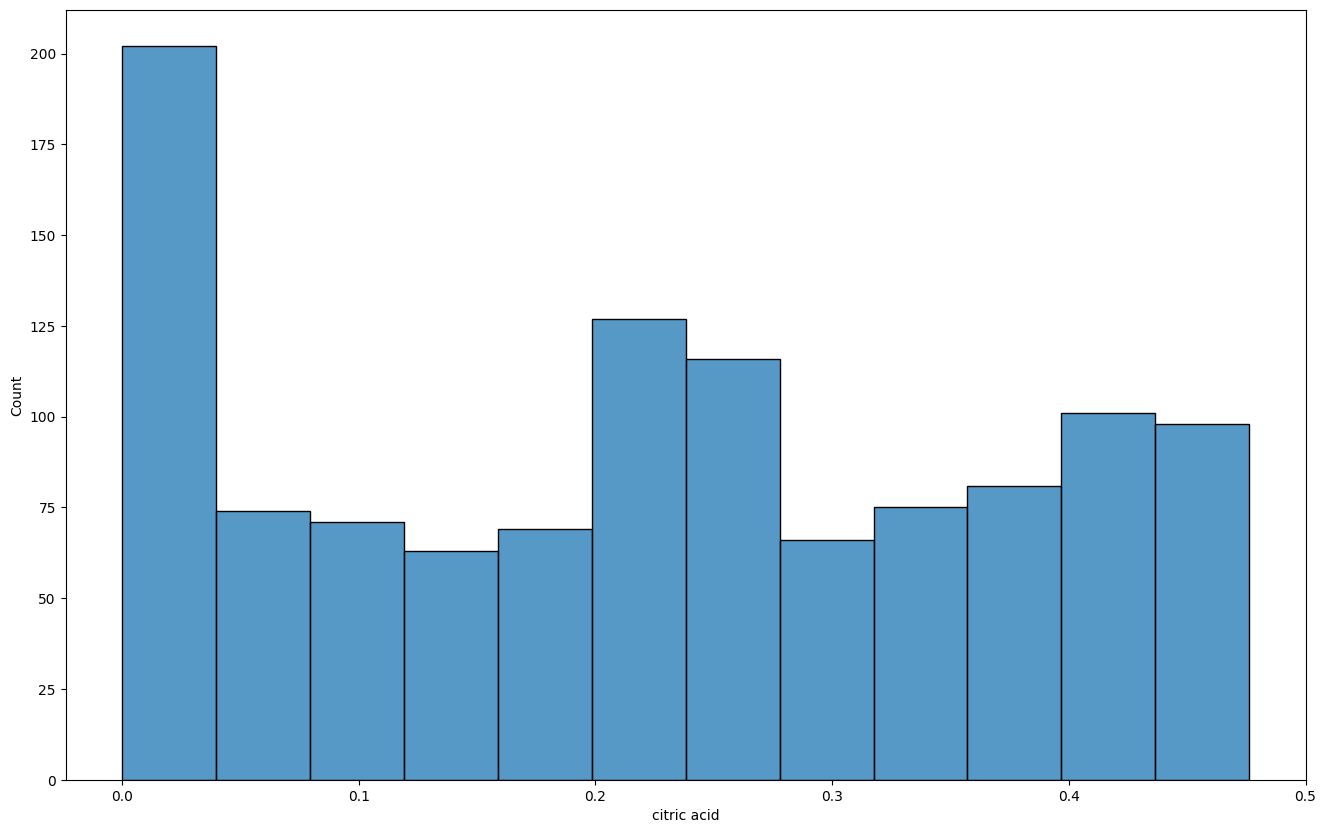

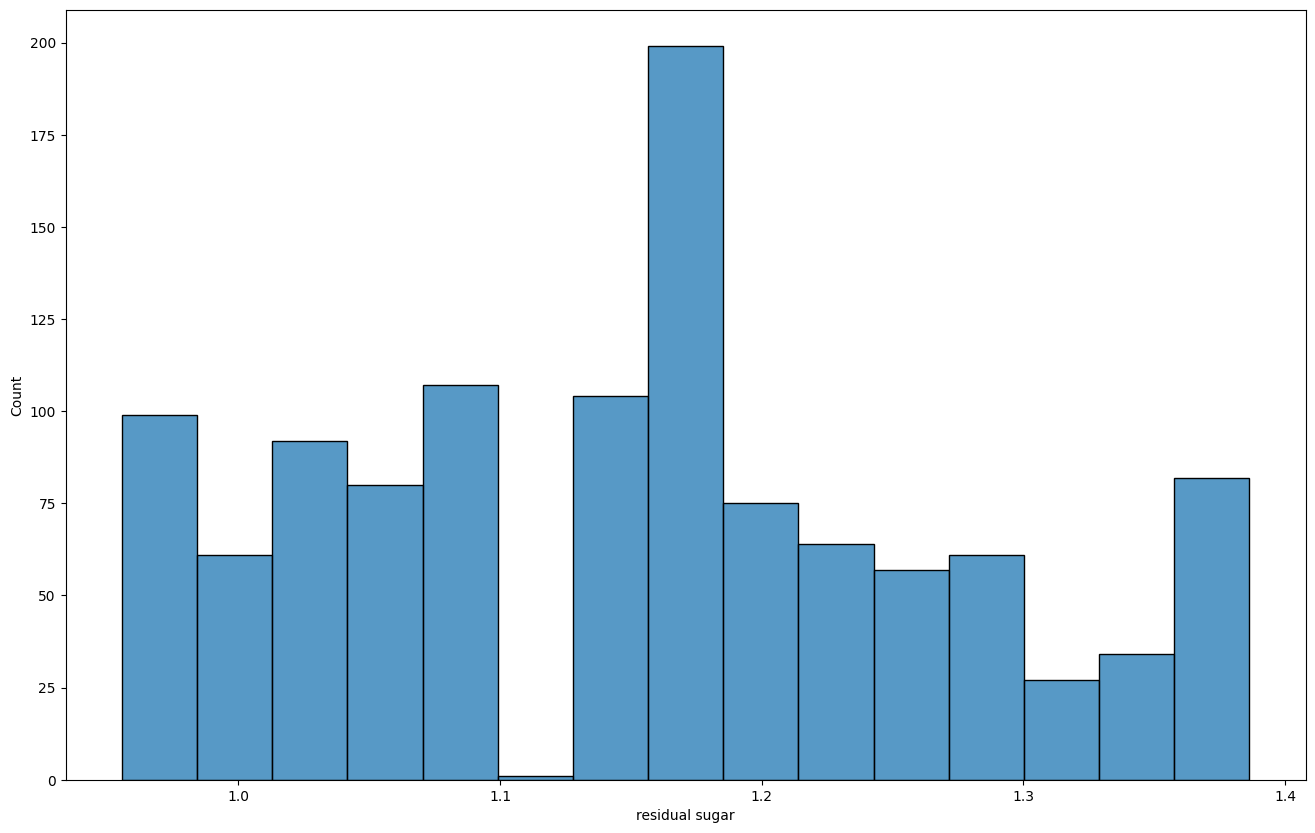

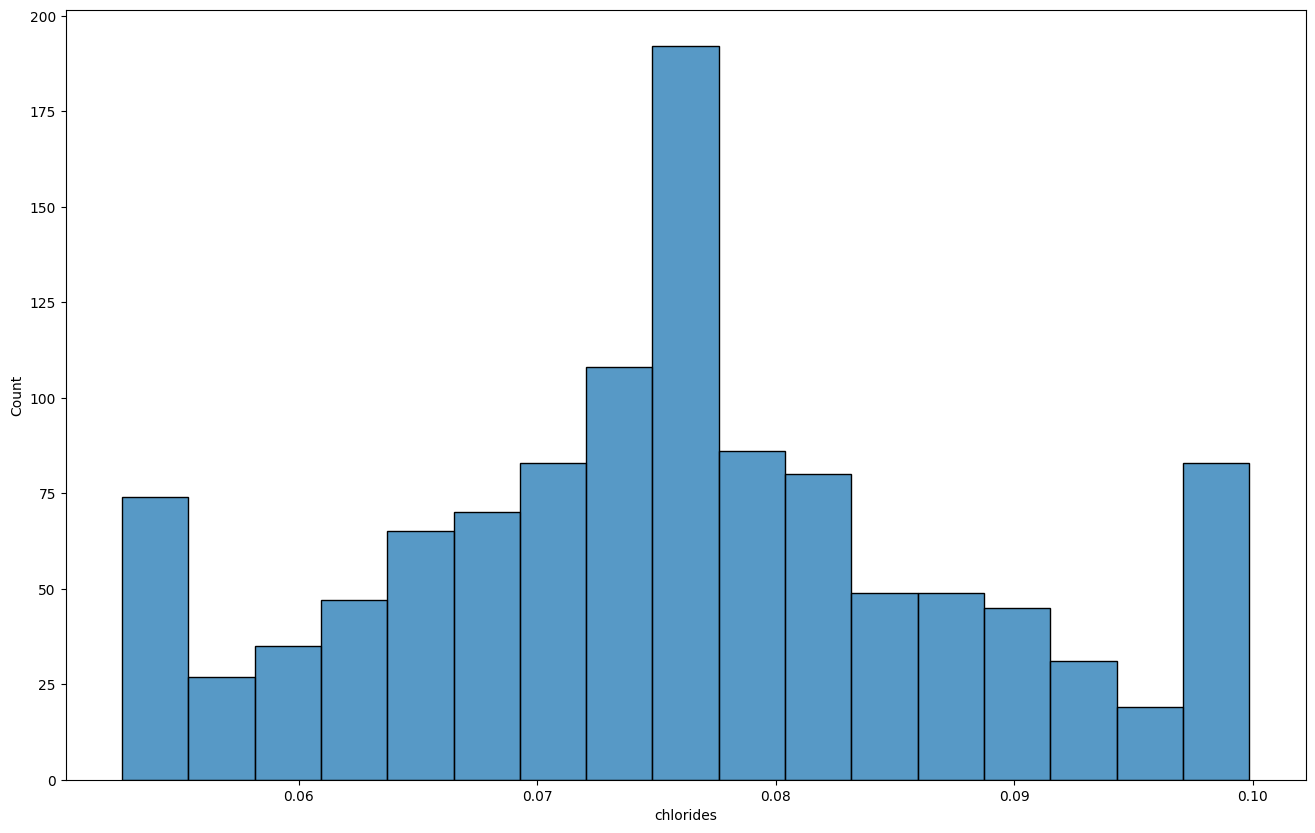

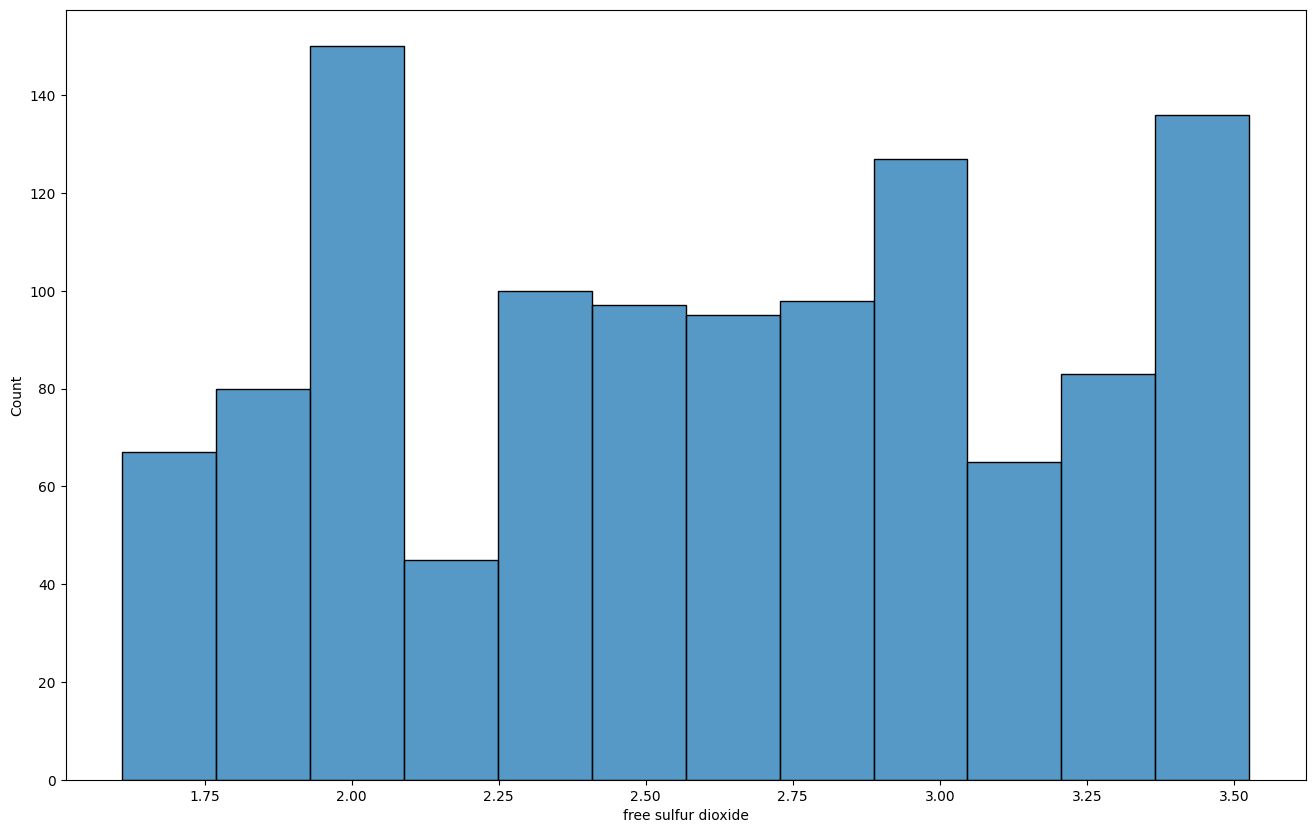

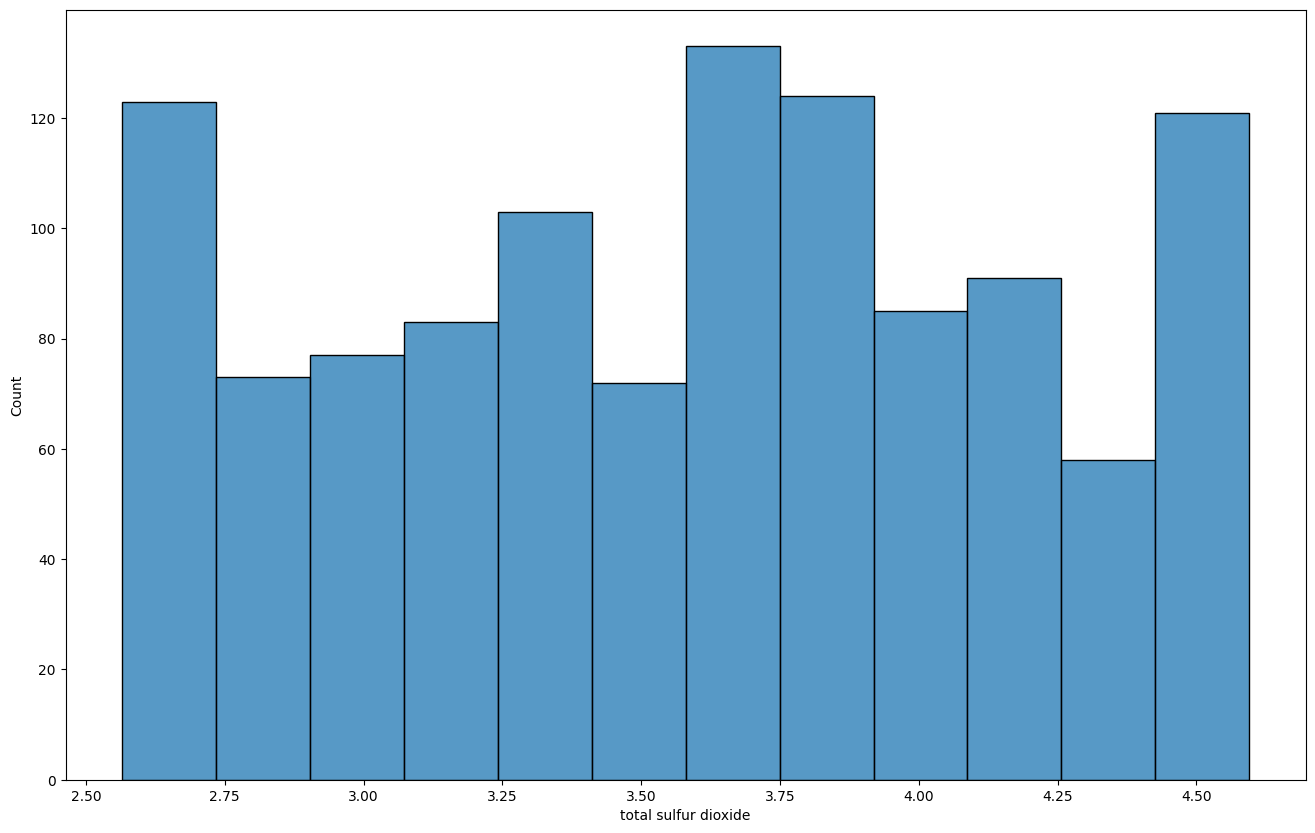

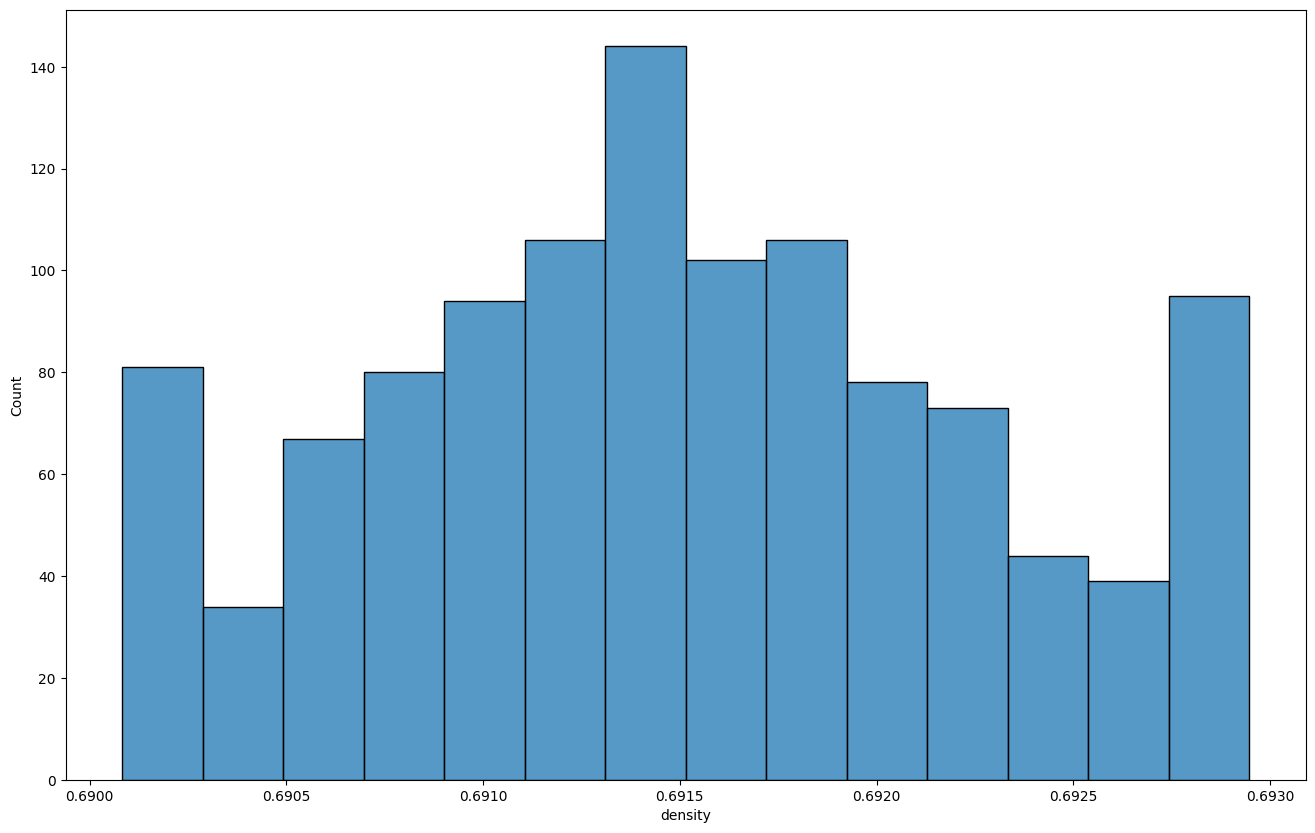

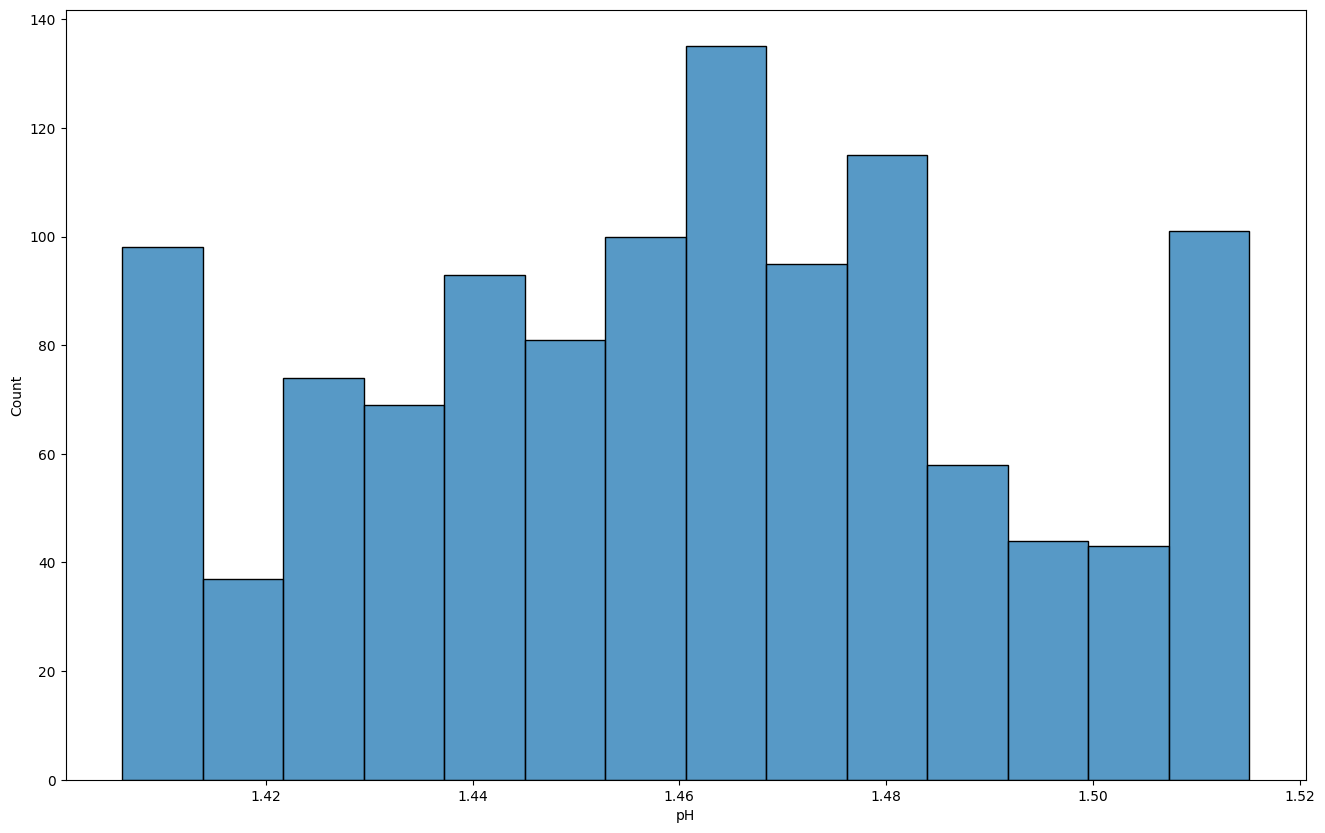

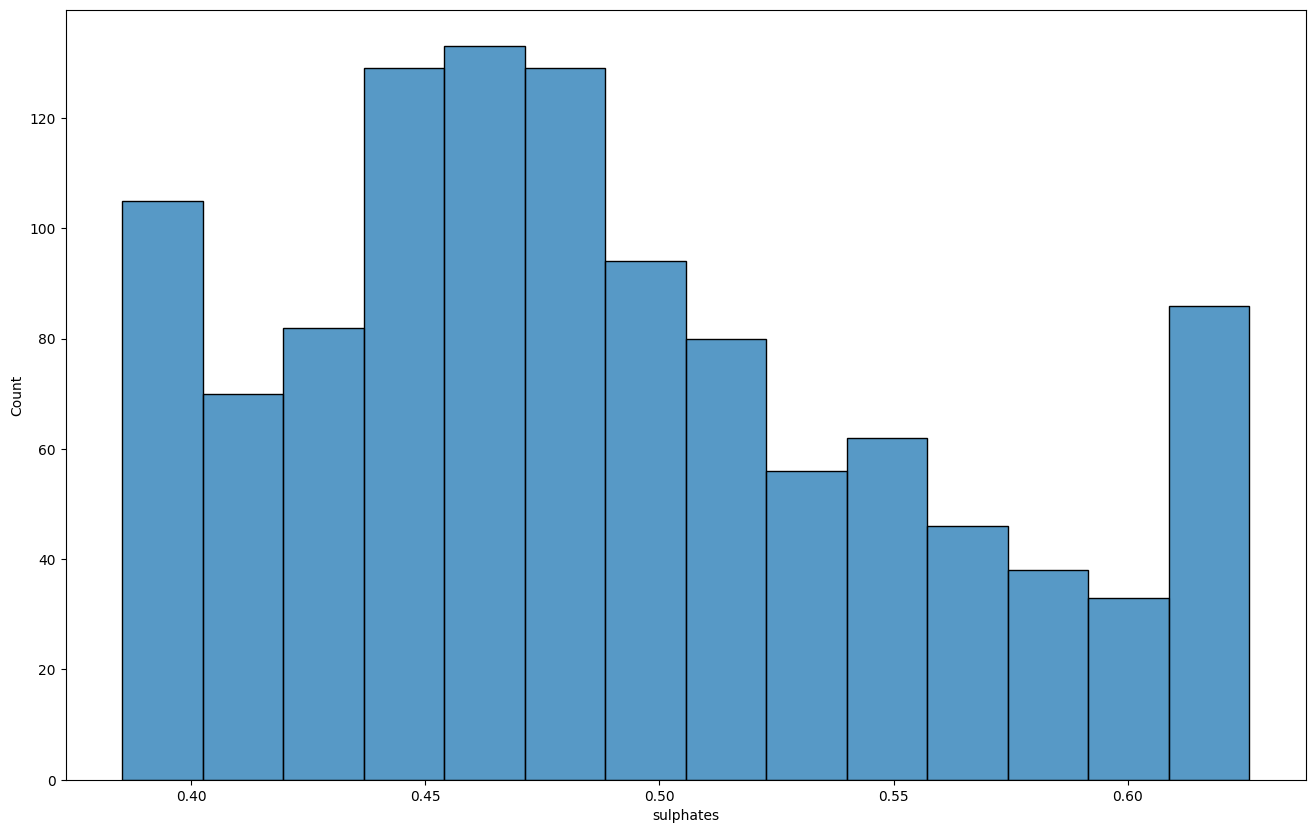

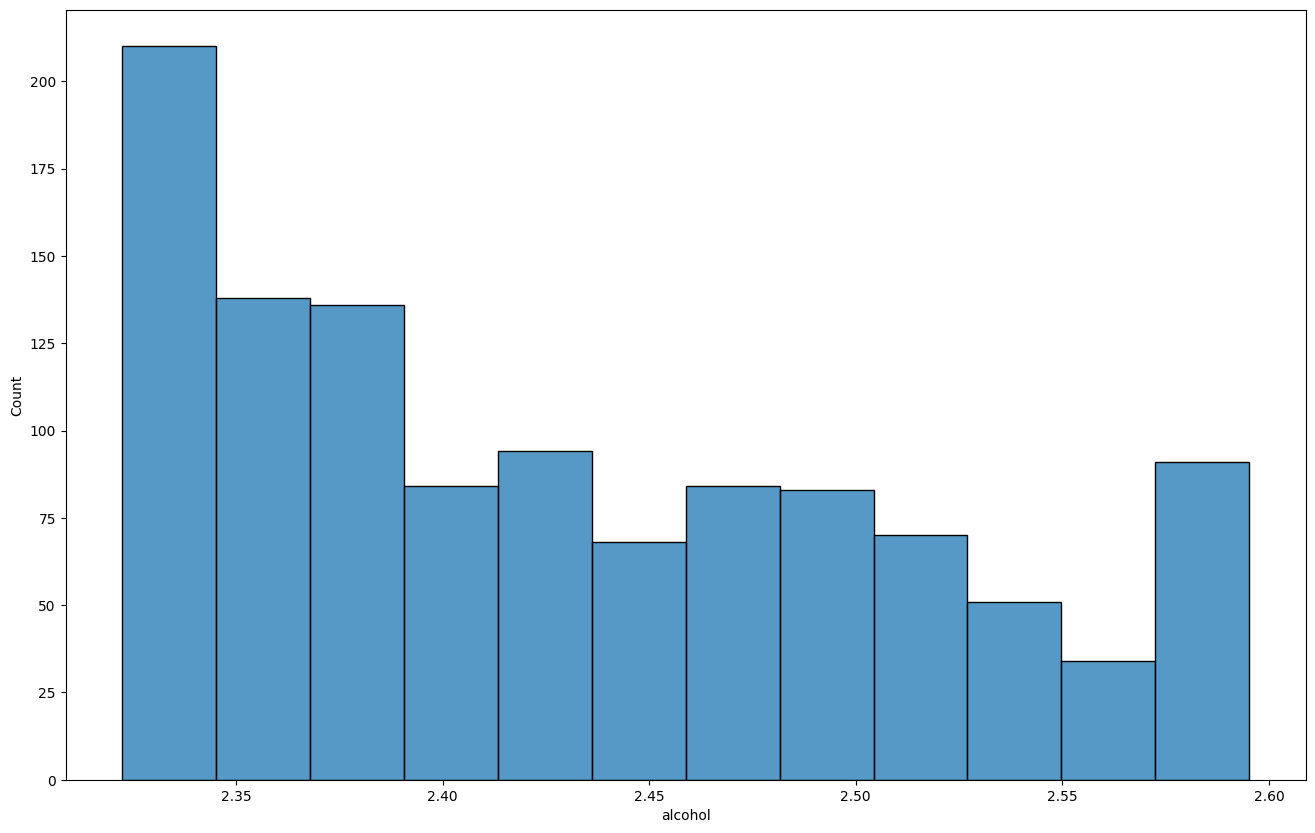

In [ ]:
for i in data.select_dtypes(include='float64').columns:
    plt.figure(figsize=(16,10))
    sns.histplot(data=data, x=i)
    plt.show()

# Korelasi

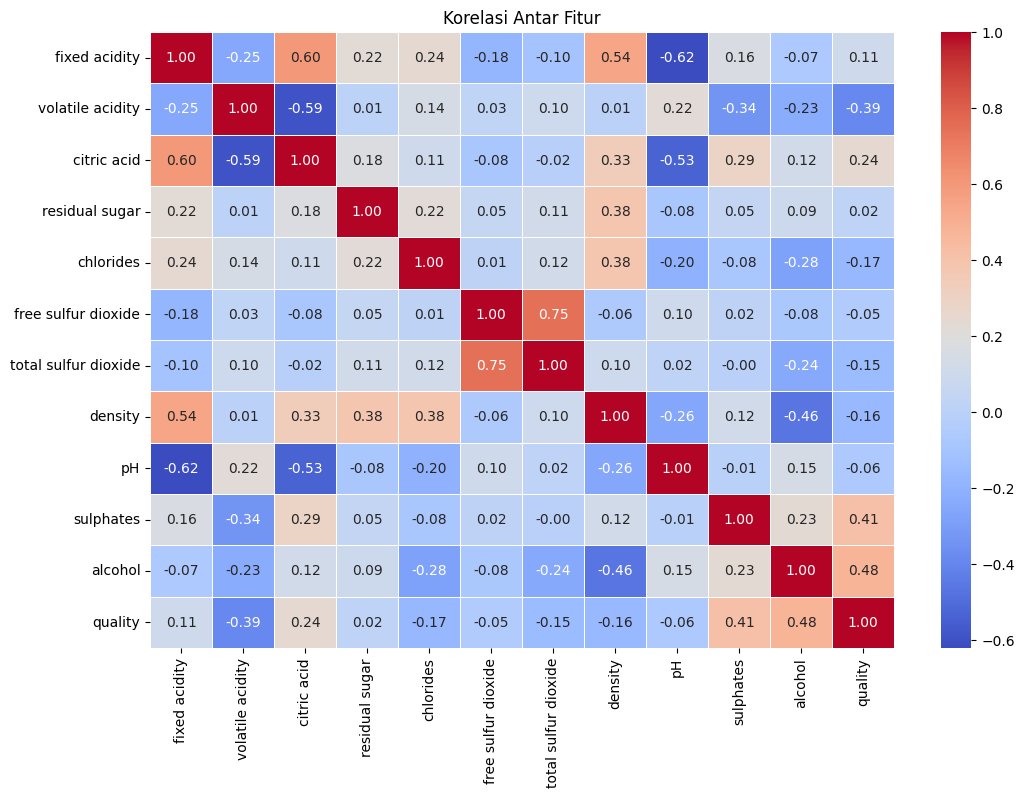

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Antar Fitur")
plt.show()

Matriks korelasi adalah alat statistik yang digunakan untuk mengukur hubungan linier antara dua variabel. Nilai korelasi berkisar dari -1 hingga 1 , di mana:

1 : Menunjukkan korelasi positif sempurna (semakin besar nilai satu variabel, semakin besar pula nilai variabel lainnya).
0 : Tidak ada korelasi linier.
-1 : Menunjukkan korelasi negatif sempurna (semakin besar nilai satu variabel, semakin kecil nilai variabel lainnya).
Dalam matriks ini, setiap sel merepresentasikan korelasi antara dua fitur. Warna pada matriks memberikan visualisasi intensitas korelasi:

Warna merah tua : Mengindikasikan korelasi positif kuat.
Warna biru tua : Mengindikasikan korelasi negatif kuat.
Warna putih : Mengindikasikan korelasi rendah atau tidak ada korelasi.
Langkah-langkah Analisis:
Identifikasi Variabel :
Variabel dalam matriks adalah: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, dan quality.
Pengamatan Utama :
Diagonal utama matriks selalu bernilai 1 , karena setiap variabel memiliki korelasi sempurna dengan dirinya sendiri.
Selain diagonal utama, kita fokus pada nilai-nilai di luar diagonal untuk melihat hubungan antar variabel.
Analisis Hubungan :
Berikut adalah beberapa hubungan penting yang dapat dilihat dari matriks:
1. Korelasi dengan quality (Baris terakhir)
Positif Kuat :
alcohol: 0.48 (korelasi positif kuat). Semakin tinggi kadar alkohol, semakin tinggi kualitas anggur.
sulphates: 0.23 (korelasi positif moderat). Kadar sulfat juga memiliki pengaruh positif terhadap kualitas.
Negatif Kuat :
volatile acidity: -0.39 (korelasi negatif kuat). Semakin tinggi asam volatil, semakin rendah kualitas anggur.
chlorides: -0.33 (korelasi negatif kuat). Tingkat klorida memiliki hubungan negatif dengan kualitas.
Lainnya :
citric acid: 0.24 (korelasi positif moderat).
density: 0.41 (korelasi positif kuat). Densitas memiliki pengaruh positif terhadap kualitas.
pH: -0.06 (korelasi sangat lemah).
2. Hubungan Antara Variabel Lain
Korelasi Positif Kuat :
total sulfur dioxide dan free sulfur dioxide: 0.75 (korelasi positif kuat). Ini logis karena kedua variabel berkaitan erat.
density dan residual sugar: 0.38 (korelasi positif moderat). Semakin tinggi gula sisa, semakin tinggi densitas.
Korelasi Negatif Kuat :
volatile acidity dan citric acid: -0.59 (korelasi negatif kuat). Asam volatil cenderung berbanding terbalik dengan asam sitrat.
pH dan citric acid: -0.53 (korelasi negatif kuat). pH tinggi biasanya berhubungan dengan asam sitrat rendah.
Lainnya :
alcohol dan density: -0.46 (korelasi negatif kuat). Alkohol memiliki hubungan negatif dengan densitas.
alcohol dan volatile acidity: -0.23 (korelasi negatif moderat).

kesimpulan :
Faktor yang Memengaruhi Kualitas :
Faktor-faktor seperti alcohol, density, dan sulphates memiliki korelasi positif dengan kualitas, sedangkan volatile acidity dan chlorides memiliki korelasi negatif.
Hubungan Antara Variabel Kimia :
Ada hubungan yang kuat antara total sulfur dioxide dan free sulfur dioxide, serta antara density dan residual sugar.
pH memiliki hubungan negatif dengan citric acid, menunjukkan bahwa pH tinggi biasanya berarti asam sitrat rendah.

In [ ]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.252737,0.598175,0.224366,0.241431,-0.176895,-0.103190,0.544630,-0.619705,0.160833,-0.069021,0.106630
volatile acidity,-0.252737,1.000000,-0.590078,0.009348,0.143647,0.027407,0.097268,0.005716,0.216428,-0.338181,-0.233156,-0.389458
citric acid,0.598175,-0.590078,1.000000,0.177290,0.107179,-0.083112,-0.017951,0.330702,-0.533821,0.290017,0.120057,0.241436
residual sugar,0.224366,0.009348,0.177290,1.000000,0.217120,0.051538,0.114842,0.381364,-0.084017,0.049467,0.090662,0.022004
chlorides,0.241431,0.143647,0.107179,0.217120,1.000000,0.014870,0.117502,0.383233,-0.197709,-0.084373,-0.282953,-0.167757
free sulfur dioxide,-0.176895,0.027407,-0.083112,0.051538,0.014870,1.000000,0.745479,-0.060590,0.104696,0.019115,-0.075400,-0.048438
total sulfur dioxide,-0.103190,0.097268,-0.017951,0.114842,0.117502,0.745479,1.000000,0.099803,0.022142,-0.002551,-0.240859,-0.150702
density,0.544630,0.005716,0.330702,0.381364,0.383233,-0.060590,0.099803,1.000000,-0.258122,0.116617,-0.464252,-0.159343
pH,-0.619705,0.216428,-0.533821,-0.084017,-0.197709,0.104696,0.022142,-0.258122,1.000000,-0.008363,0.145654,-0.063304
sulphates,0.160833,-0.338181,0.290017,0.049467,-0.084373,0.019115,-0.002551,0.116617,-0.008363,1.000000,0.228831,0.414454


# Count TerWine

In [ ]:
data['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


In [ ]:
quality_counts = data['quality'].value_counts()

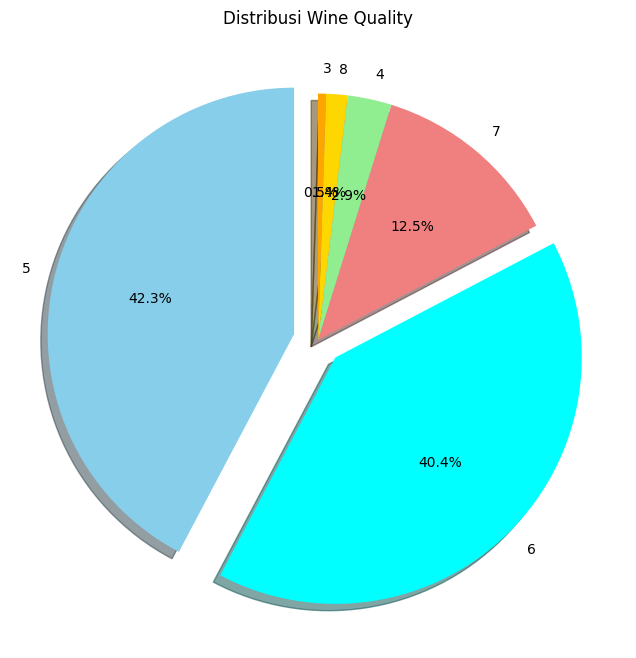

In [ ]:
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.display import display

plt.figure(figsize=(10, 8))
plt.pie(
    quality_counts,
    labels=quality_counts.index,
    autopct='%1.1f%%',
    explode=(0.1, 0.1, 0, 0, 0, 0),
    colors=['skyblue', 'cyan', 'lightcoral', 'lightgreen', 'gold', 'orange'],
    startangle=90,
    shadow=True
    )
plt.title('Distribusi Wine Quality')
plt.show()

# Penerapan Algoritma / Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
y = data['quality'].apply(lambda x: 1 if x >= 7 else 0)  # 1 = baik, 0 = buruk

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.530628,0.000000,1.064711,0.073250,2.484907,3.555348,0.692047,1.506297,0.444686,2.341806,5
1,2.174752,0.598837,0.000000,1.280934,0.093490,3.258097,4.219508,0.691546,1.435085,0.518794,2.379546,5
2,2.174752,0.565314,0.039221,1.193922,0.088011,2.772589,4.007333,0.691646,1.449269,0.500775,2.379546,5
3,2.493205,0.246860,0.444686,1.064711,0.072321,2.890372,4.110874,0.692147,1.425515,0.457425,2.379546,6
4,2.128232,0.530628,0.000000,1.064711,0.073250,2.484907,3.555348,0.692047,1.506297,0.444686,2.341806,5


# Feature Scalling

In [ ]:
X=data.drop(['quality'],axis=1)
y=data['quality']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Train and Testing

In [ ]:
X = data.drop(['quality'], axis=1)
y = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X = data.drop(columns=['quality'])
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None , 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)

In [ ]:
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf=RandomForestClassifier(**rf_Grid.best_params_)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import sklearn.metrics as metrics
y_pred1=rf.predict(X_test)
score_rf=accuracy_score(y_test,y_pred1)
score_rf

0.9694323144104804

In [ ]:
f1_rf=f1_score(y_pred1,y_test, pos_label='positive',average='micro')
f1_rf

0.9694323144104804

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           4       1.00      0.17      0.29         6
           5       0.95      1.00      0.97        96
           6       1.00      1.00      1.00        99
           7       0.93      1.00      0.96        26
           8       0.00      0.00      0.00         2

    accuracy                           0.97       229
   macro avg       0.78      0.63      0.64       229
weighted avg       0.96      0.97      0.96       229



Text(50.722222222222214, 0.5, 'True')

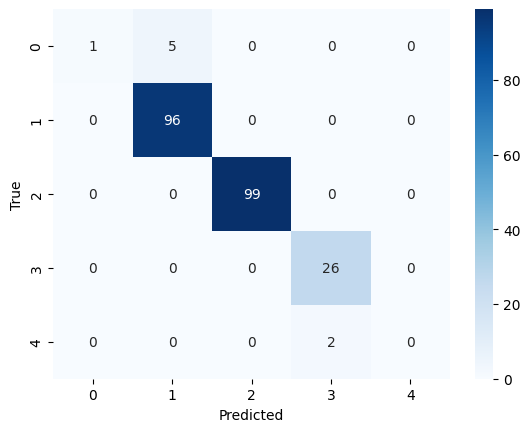

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

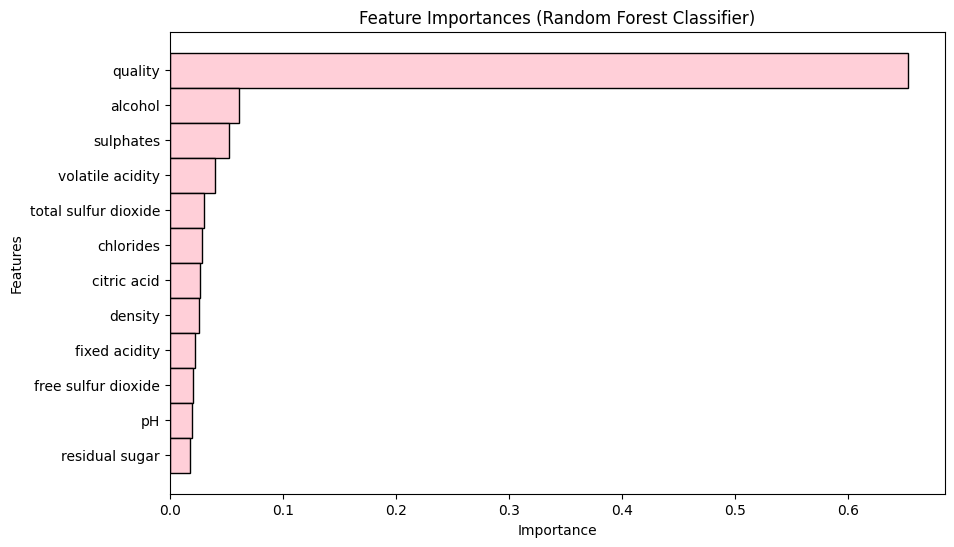

In [ ]:
feature_importances = rf.feature_importances_
features = X.columns
importances = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.histplot(data=importances, y="Feature", weights="Importance", bins=10, kde=False, color='pink' )
plt.title("Feature Importances (Random Forest Classifier)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Logistic Regresi

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr=LogisticRegression()

In [ ]:
param_grid = {
    'penalty': ['l1','l2'],
    'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
    'max_iter': [1000,1500,2000],
    'multi_class' :['auto', 'ovr', 'multinomial'],
    'class_weight' :['dict','balanced']
}

In [ ]:
lgr_grid=GridSearchCV(estimator=lgr,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=True)

In [ ]:
lgr_grid.fit(X_train,y_train)
lgr_grid.best_params_

{'class_weight': 'balanced',
 'max_iter': 1000,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
log=LogisticRegression(**lgr_grid.best_params_)

In [ ]:
log.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='auto',
                   penalty='l1', solver='liblinear')

In [ ]:
y_pred2=log.predict(X_test)
score_log=accuracy_score(y_test,y_pred2)
score_log

0.7641921397379913

In [ ]:
f1_log=f1_score(y_pred2,y_test,pos_label='positive',average='micro')
f1_log

0.7641921397379913

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       201
           1       0.32      0.86      0.47        28

    accuracy                           0.76       229
   macro avg       0.65      0.80      0.66       229
weighted avg       0.89      0.76      0.80       229



Text(50.722222222222214, 0.5, 'True')

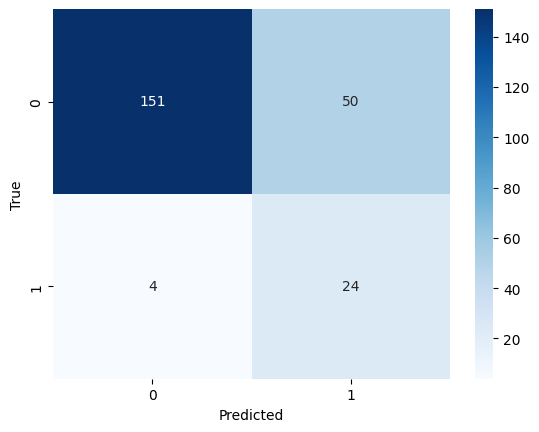

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

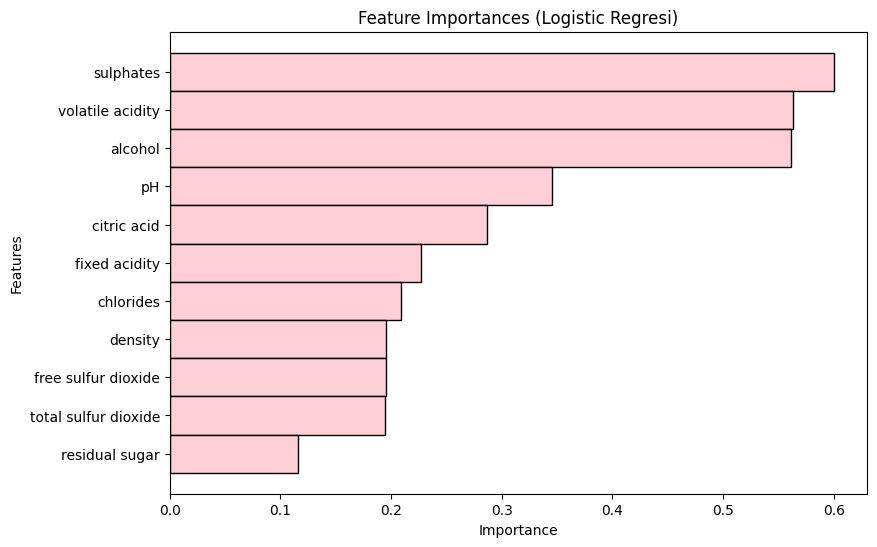

In [ ]:
feature_importances = np.abs(log_reg.coef_).mean(axis=0)

features = X.columns
importances = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(9, 6))
sns.histplot(data=importances, y="Feature", weights="Importance", bins=10, kde=False, color='pink' )
plt.title("Feature Importances (Logistic Regresi)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

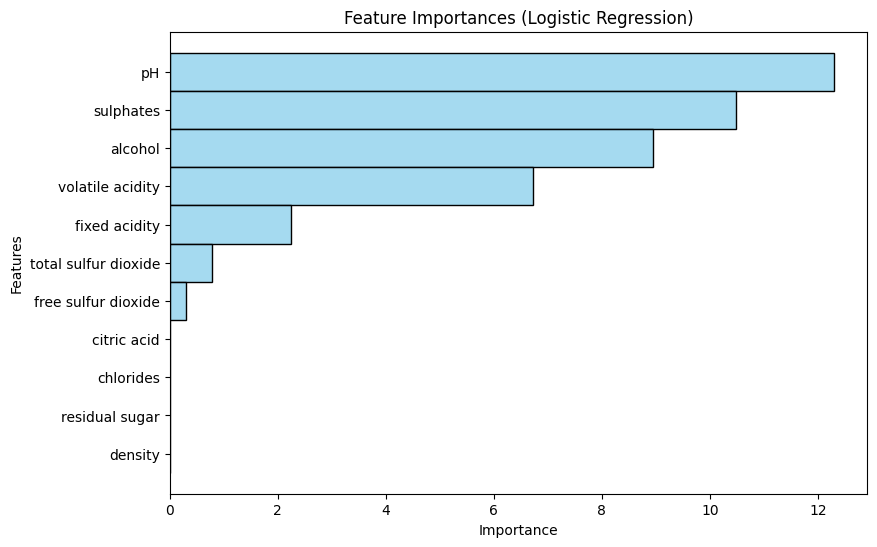

In [ ]:
feature_importances_log = np.abs(log.coef_).mean(axis=0)

features_log = X.columns
importances_log = pd.DataFrame({
    'Feature': features_log,
    'Importance': feature_importances_log
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(9, 6))
sns.histplot(data=importances_log, y="Feature", weights="Importance", bins=10, kde=False, color='skyblue')
plt.title("Feature Importances (Logistic Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = [{
    'n_neighbors': range(3,21),
    'algorithm':['ball_tree','kd_tree','brute'],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]

In [ ]:
knn_Grid= GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=3, verbose=0, n_jobs=-1)

In [ ]:
knn_Grid.fit(X_train,y_train)
knn_Grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}

In [ ]:
knn=KNeighborsClassifier(**knn_Grid.best_params_)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=11, weights='distance')

In [ ]:
y_pred3=knn.predict(X_test)
score_knn=accuracy_score(y_pred3,y_test)
score_knn

0.9126637554585153

In [ ]:
f1_knn=f1_score(y_pred3,y_test,pos_label='positive',average='micro')
f1_knn

0.9126637554585153

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred3)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       201
           1       0.68      0.54      0.60        28

    accuracy                           0.91       229
   macro avg       0.81      0.75      0.78       229
weighted avg       0.91      0.91      0.91       229



Text(50.722222222222214, 0.5, 'True')

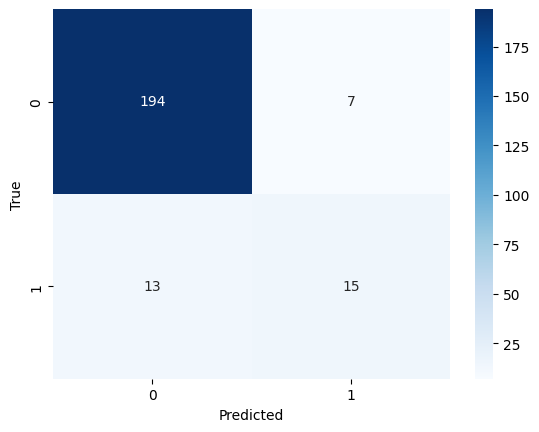

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_knn = knn.predict(X_test)

precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Precision (KNN): {precision_knn}")
print(f"Recall (KNN): {recall_knn}")
print(f"F1-score (KNN): {f1_knn}")

Precision (KNN): 0.6818181818181818
Recall (KNN): 0.5357142857142857
F1-score (KNN): 0.6


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=3, verbose=1, n_jobs=-1)
dt_grid.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


Accuracy (Decision Tree): 0.868995633187773

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       201
           1       0.47      0.64      0.55        28

    accuracy                           0.87       229
   macro avg       0.71      0.77      0.73       229
weighted avg       0.89      0.87      0.88       229



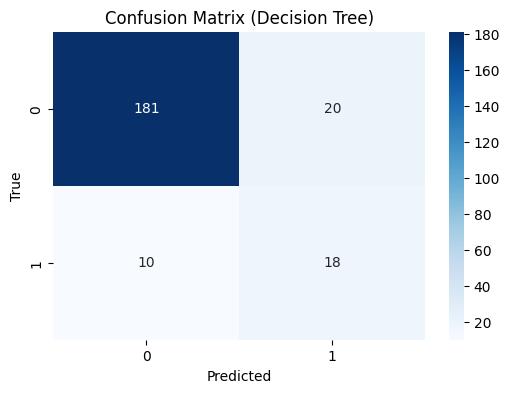

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

dt_best = DecisionTreeClassifier(**dt_grid.best_params_, random_state=42)
dt_best.fit(X_train, y_train)
y_pred_dt = dt_best.predict(X_test)

score_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {score_dt}")

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
cm_dt = metrics.confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

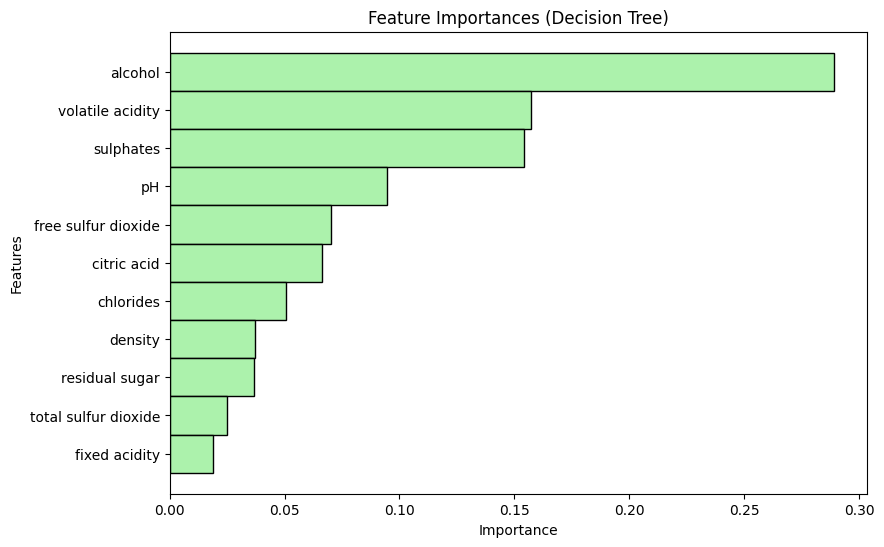

In [ ]:
feature_importances_dt = dt_best.feature_importances_

features_dt = X.columns
importances_dt = pd.DataFrame({
    'Feature': features_dt,
    'Importance': feature_importances_dt
}).sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(9, 6))
sns.histplot(data=importances_dt, y="Feature", weights="Importance", bins=10, kde=False, color='lightgreen')
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Xgboost

Accuracy (XGBoost): 0.9170305676855895

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       201
           1       0.66      0.68      0.67        28

    accuracy                           0.92       229
   macro avg       0.81      0.81      0.81       229
weighted avg       0.92      0.92      0.92       229



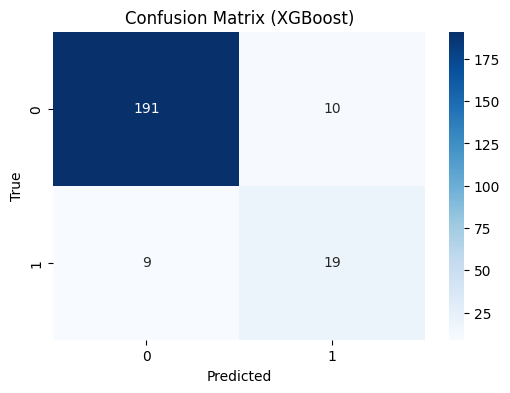

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

score_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost): {score_xgb}")

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

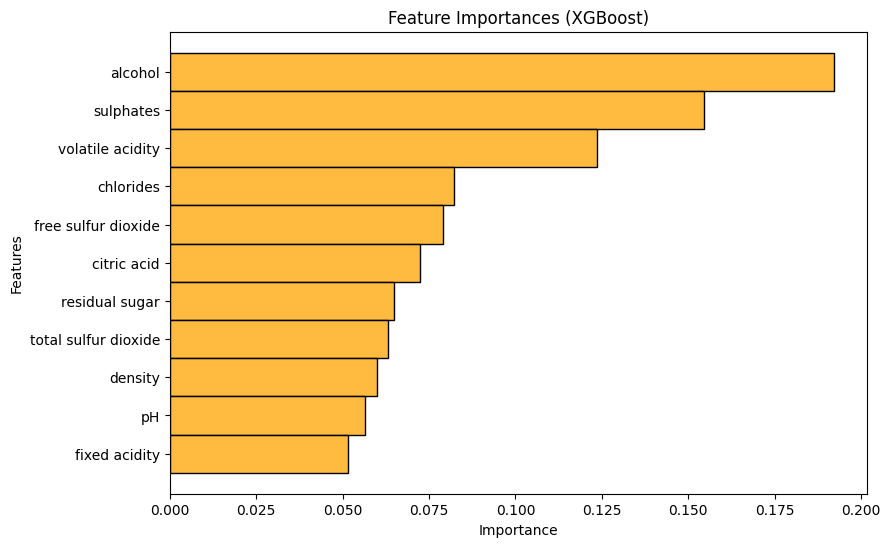

In [ ]:
feature_importances_xgb = xgb_model.feature_importances_

features_xgb = X.columns
importances_xgb = pd.DataFrame({
    'Feature': features_xgb,
    'Importance': feature_importances_xgb
}).sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(9, 6))
sns.histplot(data=importances_xgb, y="Feature", weights="Importance", bins=10, kde=False, color='orange')
plt.title("Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# ROC - AUC

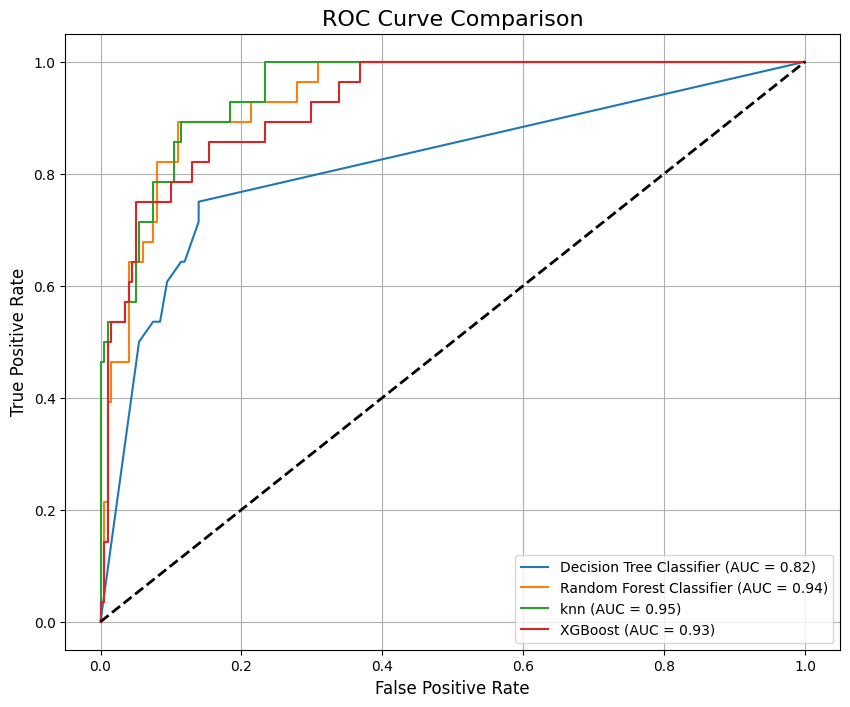

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

models = {
    "Decision Tree Classifier": DecisionTreeClassifier(**dt_grid.best_params_),
    "Random Forest Classifier": RandomForestClassifier(**rf_Grid.best_params_),
    "knn": KNeighborsClassifier(**knn_Grid.best_params_),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(**lgr_grid.best_params_)
}
}


plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid()
plt.show()

# Kesimpulan